In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [2]:
## uni = file name
uni = "dir"

path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [ ]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

dir_padding_1_128_8_128_200_5l_e_200_1000MeV
dir_padding_1_128_8_128_200_5l_mu_200_1000MeV
direction_e_1_128_8_128_5_20250116
direction_e_1_128_8_256_7_20250116
direction_mu_1_128_8_128_5_20250116
direction_mu_1_128_8_256_7_20250116


0 144  /  MTL = 9.4054598  /  MTL epoch = 0144  /  15.1701555  /  MVL = 15.1701555  /  MVL epoch = 0072  /  direction_mu_1_128_8_128_5_20250116
1 126  /  MTL = 10.9997649  /  MTL epoch = 0126  /  17.0133753  /  MVL = 17.0133753  /  MVL epoch = 0071  /  direction_e_1_128_8_128_5_20250116
2 18  /  MTL = 13.7033496  /  MTL epoch = 0015  /  14.4845356  /  MVL = 14.4845356  /  MVL epoch = 0009  /  dir_padding_1_128_8_128_200_5l_e_200_1000MeV
3 21  /  MTL = 10.7792545  /  MTL epoch = 0021  /  11.6752949  /  MVL = 11.6752949  /  MVL epoch = 0014  /  dir_padding_1_128_8_128_200_5l_mu_200_1000MeV
4 55  /  MTL = 12.0389486  /  MTL epoch = 0055  /  13.2863012  /  MVL = 13.2863012  /  MVL epoch = 0054  /  direction_mu_1_128_8_256_7_20250116
5 43  /  MTL = 15.9091456  /  MTL epoch = 0043  /  16.5677830  /  MVL = 16.5677830  /  MVL epoch = 0041  /  direction_e_1_128_8_256_7_20250116


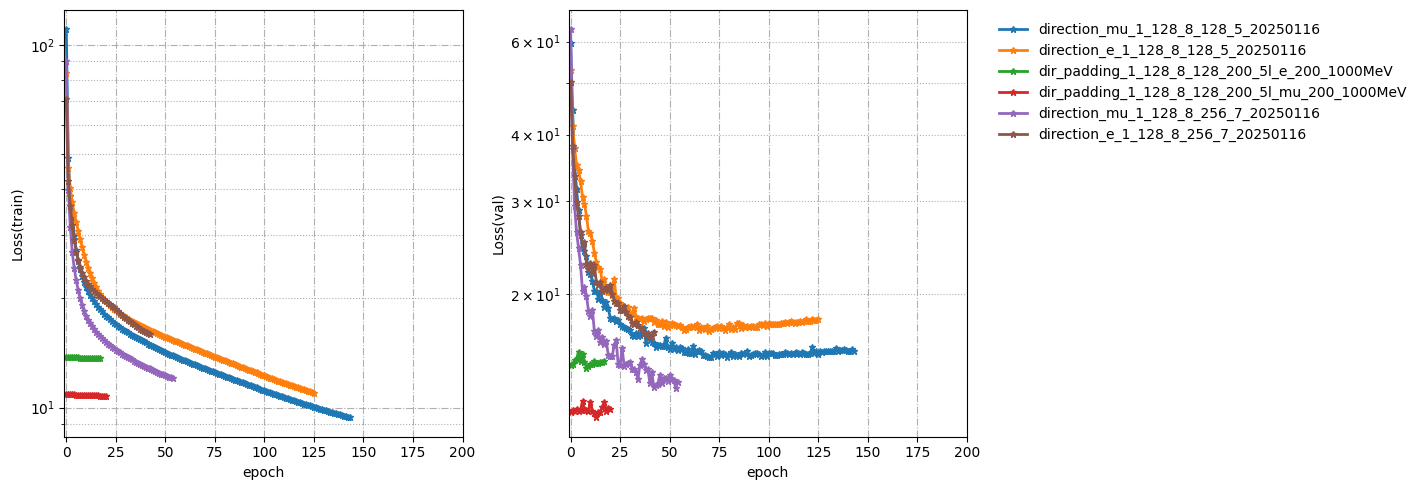

In [4]:

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([-1, 200])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])
    label = train_list[i]
    
    l = ax1.plot(df['loss'], '*-', linewidth=2)
    ax2.plot(df['val_loss'], '*-', linewidth=2, label=label.split('/')[-2])

    print(
        i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.7f}",
        " / ",
        "MTL epoch = " + str("{:04}".format(1 + np.where(df['loss'] == df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL = " + f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL epoch = " + str("{:04}".format(1 + np.where(df['val_loss'] == df['val_loss'].min())[0][0])),
        " / ",
        label.split('/')[-2]
    )

    lines.append(l[0])
    labels.append(label)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()
plt.close()